<a href="https://colab.research.google.com/github/Aleena24/PRODIGY_ML/blob/main/PRODIGY_ML_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [100]:
import os
import numpy as np
from skimage.transform import resize
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [101]:
def load_images(folder_path, image_size=(100, 100)):
    images = []
    labels = []

    cat_folder = os.path.join(folder_path, "cats")
    for filename in os.listdir(cat_folder):
        img = Image.open(os.path.join(cat_folder, filename))
        img = img.resize(image_size)
        img = np.array(img)
        images.append(img.flatten())
        labels.append(0)

    dog_folder = os.path.join(folder_path, "dogs")
    for filename in os.listdir(dog_folder):
        img = Image.open(os.path.join(dog_folder, filename))
        img = img.resize(image_size)
        img = np.array(img)
        images.append(img.flatten())
        labels.append(1)

    return np.array(images), np.array(labels)


In [102]:
dataset_path = "/content/drive/MyDrive/data/train"

images, labels = load_images(dataset_path)

print("Shape of images array:", images.shape)


Shape of images array: (2000, 30000)


In [103]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [104]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [105]:
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [106]:
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_pca, y_train)

SVC(random_state=42)

In [107]:
def classify_image(img, model, scaler, pca):
    img_resized = resize(img, (100, 100)).flatten()
    img_scaled = scaler.transform([img_resized])
    img_pca = pca.transform(img_scaled)
    prediction = model.predict(img_pca)
    return "cat" if prediction[0] == 0 else "dog"

In [108]:
def pick_random_image(folder_path):
    image_files = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith(".jpg") or file.endswith(".png"):
                image_files.append(os.path.join(root, file))

    if not image_files:
        raise ValueError("No image files found in the specified folder.")

    random_image_file = np.random.choice(image_files)
    img = Image.open(random_image_file)
    img = img.convert("RGB")
    img = np.array(img)
    return img, os.path.basename(random_image_file)


In [109]:
y_pred = svm_model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
accuracy_percentage = accuracy * 100
print(f"Model Accuracy: {accuracy_percentage:.2f}%")

Model Accuracy: 64.25%


In [110]:
random_image_folder = "/content/drive/MyDrive/data/validation"
random_img, random_filename = pick_random_image(random_image_folder)
prediction = classify_image(random_img, svm_model, scaler, pca)

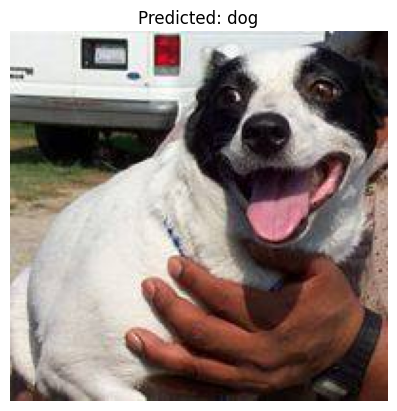

The model predicts the image 'dog.1244.jpg' as a dog.


In [111]:
plt.imshow(random_img)
plt.title(f"Predicted: {prediction}")
plt.axis('off')
plt.show()
print(f"The model predicts the image '{random_filename}' as a {prediction}.")